In [ ]:
print(">>>installing lirary")
!pip3 install pandas matplotlib numpy scikit-surprise
print("library installed")

>>>installing lirary
     |████████████████████████████████| 11.8MB 334kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670928 sha256=04d4eabd8cfc74cea6cb092853865c851ab00f5bf3aaefab04511eb54f84b7d3
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise
library installed


In [ ]:
print("importing library")
import numpy as np
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate 
print('library imported')


importing library
library imported


In [ ]:
###########reading data
df=pd.read_csv("sample_data/ratings.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
##########dropping timestamp##########

df.drop("timestamp",axis=1,inplace=True)
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
############ check for missing data ###########

df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

**exploratory data analysis**

In [ ]:
#### number of movies/users  ###########


n_movies=df["movieId"].nunique()
n_users=df["userId"].nunique()
print("number of  movie is {}".format(n_movies))
print("number of  user is {}".format(n_users))

number of  movie is 9724
number of  user is 610


In [ ]:
############ sparsity of data    ###############


available_rating=df["rating"].count()
total_rating=n_movies*n_users
missing_rating=total_rating-available_rating
sparsity=(missing_rating/total_rating)*100
print("sparsity is {}".format(sparsity))

sparsity is 98.30003169443864


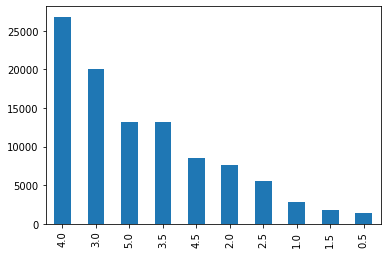

In [ ]:
####   rating distribution #######

df["rating"].value_counts().plot(kind="bar")

In [ ]:
#####  filter movies whose rating less than 3 ####
filter_movies=df["movieId"].value_counts() >3
filter_movies=filter_movies[filter_movies].index.tolist()

In [ ]:
#### filter user with less than three movie rated #####
filter_user=df["userId"].value_counts() >3
filter_user=filter_user[filter_user].index.tolist()

In [ ]:
#### filter rarely rated movies  ######

print("original shape is {}".format(df.shape))
df=df[(df["movieId"].isin(filter_movies)) & (df["userId"].isin(filter_user))]
print("new shape is {}".format(df.shape))

original shape is (100836, 3)
new shape is (92394, 3)


**create training and test set**

In [ ]:
### coloumns used for training ####

cols=["userId","movieId","rating"]

In [ ]:
######## create surprise datasets ##########
reader=Reader(rating_scale=(0.5,5))
data=Dataset.load_from_df(df[cols],reader)

In [ ]:
### create train and prectction set ###############

trainset=data.build_full_trainset()
antiset=trainset.build_anti_testset()

**Creating and traiing model**

In [ ]:
######### creating a model #######

algo=SVD(n_epochs=25,verbose=True)



In [ ]:
####### training the model #########

cross_validate(algo,data,measures=["RMSE","MAE"],cv=5,verbose=True)
print(">>training done")


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

**Pediction**

In [ ]:
prediction=algo.test(antiset)

In [ ]:
prediction[1]

Prediction(uid=1, iid=1704, r_ui=3.529119856267723, est=4.574039607133181, details={'was_impossible': False})

In [24]:
from collections import defaultdict
def get_top_n(prediction,n):
  top_n=defaultdict(list)
  for uid,iid,_,est,_ in prediction:
    top_n[uid].append((iid,est))
  for uid,user_ratings in top_n.items():
    user_ratings.sort(key=lambda x:x[1],reverse=True)
    top_n[uid]=user_ratings[:n]
  return top_n
top_n=get_top_n(prediction,n=3)
for uid,user_ratings in top_n.items():
  print(uid,[iid for (iid,rating) in user_ratings])



1 [318, 247, 898]
2 [7153, 898, 1197]
3 [1288, 1245, 1213]
4 [7153, 4993, 5952]
5 [1204, 1235, 1252]
6 [1204, 1203, 1291]
7 [1250, 1387, 858]
8 [912, 904, 1204]
9 [1228, 1221, 1104]
10 [1196, 3468, 1235]
11 [5618, 7099, 1197]
12 [527, 1198, 1213]
13 [898, 1196, 2959]
14 [2959, 898, 475]
15 [1291, 48516, 898]
16 [1235, 3275, 898]
17 [1266, 56782, 1262]
18 [750, 741, 1250]
19 [593, 1203, 527]
20 [1221, 260, 3037]
21 [2160, 7323, 1235]
22 [50, 1704, 1245]
23 [1204, 3508, 3275]
24 [904, 908, 4011]
25 [50, 2959, 318]
26 [1178, 1222, 1204]
27 [1104, 44555, 1230]
28 [3703, 1258, 741]
29 [2571, 106642, 246]
30 [750, 7361, 1228]
31 [898, 50, 318]
32 [898, 1208, 1219]
33 [1291, 2959, 2804]
34 [858, 5618, 296]
35 [1213, 750, 1193]
36 [296, 898, 2959]
37 [1196, 1262, 908]
38 [56782, 904, 3275]
39 [2028, 8874, 110]
40 [1204, 1203, 1213]
41 [3535, 175, 1204]
42 [1198, 58559, 5618]
43 [6, 50, 223]
44 [4226, 318, 527]
45 [318, 1200, 1237]
46 [260, 1252, 898]
47 [720, 1104, 1228]
48 [2019, 1136, 2997]
